# 🧠 [Part I] Exploratory Data Analysis

Welcome to the first notebook in Team Quail’s submission for the **FLIQ Hackathon**.

Our project, **Quail** – *Quantum Understanding and AI for Interpretability and Learning* – explores how hybrid quantum-classical models and interpretable machine learning can be used to address challenging problems in drug discovery.

In this notebook, we perform an initial **exploratory data analysis (EDA)** on the provided dataset for drug-induced autoimmunity prediction. Our goal is to:
- Understand the structure and quality of the data
- Identify patterns, trends, and correlations in molecular descriptors
- Prepare the dataset for downstream modeling, including feature selection and dimensionality reduction

Let’s dive into the data and uncover the molecular insights within.

## Data Loading and First Impressions

In [19]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# show all columns
pd.set_option('display.max_columns', None)  

In [20]:
# import the training file
df_train = pd.read_csv("drug+induced+autoimmunity+prediction/DIA_trainingset_RDKit_descriptors.csv")
df_train.head()

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,RingCount,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,6.668,6.668,4.719,4.719,3.241,3.241,6.093,9.185,0.0,35.509,22.291,4.900,20.224,41.210,0.000,24.787,11.467,422.162,0.150,-4.28,31,403.272,1.218475e+07,20.012,7.859,3.564,175.833,14.164,0.452,14.164,0.413,0.018,0.413,-0.668,-0.452,2.443,113.689,422.424,4,10,0,0,0,1,3,4,9,2,11,0,6,0,0,0,158,16.204,17.199,23.107,0.0,0.000,6.093,4.900,28.819,5.099,0.000,18.199,18.199,18.808,19.041,4,13.922,34.450,0.000,24.732,0.000,6.545,30.525,53.976,0,11.518,16.367,26.508,0.0,0.000,44.983,11.282,5.817,5.563,42.595,0.0,22.552,0,138.07,0,0.000,0,0,0,0,0,0,15.727,62.940,0,0,0,2,0,5,0,0,0,0,1,1,0,0,0,6,0,2,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,3.545,4.661,2.449,3.735,1.520,2.621,12.073,10.002,0.0,0.000,5.063,14.963,0.000,18.261,30.332,0.000,5.734,236.062,0.182,-1.59,16,224.200,5.774616e+03,10.912,4.112,1.868,96.858,10.832,0.350,10.832,0.339,0.421,0.339,-0.843,-0.350,2.732,63.449,236.296,3,4,0,0,0,1,1,2,3,2,5,0,3,0,0,0,84,5.734,0.000,0.000,0.0,0.000,6.031,5.207,4.795,5.063,11.337,18.199,24.443,9.577,6.042,2,10.002,27.454,0.000,5.063,5.734,12.966,0.000,35.209,0,0.000,5.734,4.795,0.0,11.337,16.302,0.000,0.000,17.843,30.332,0.0,10.086,0,66.56,0,1.542,0,0,0,0,0,0,0.000,39.292,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.47

In [21]:
# import the test file
df_test = pd.read_csv("drug+induced+autoimmunity+prediction/DIA_testset_RDKit_descriptors.csv")
df_test.head()

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,RingCount,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,C[C@H](\C=C\[C@H](O)C1CC1)[C@@H]2CC[C@@H]3\C(=...,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,10.736,10.736,8.532,8.532,6.626,6.626,12.208,15.320,0.0,6.104,41.928,17.567,44.098,0.000,0.000,44.730,0.000,412.298,0.704,-1.16,30,372.294,8.390163e+06,22.049,8.763,4.397,181.829,10.227,0.393,10.227,0.081,0.250,0.081,-0.621,-0.393,5.091,121.760,412.614,3,3,4,0,4,0,0,0,3,3,3,0,5,4,0,4,166,15.320,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,50.304,91.599,6.421,18.312,4,15.320,0.000,0.0,0.000,29.087,89.947,0.000,47.602,0,0.000,0.000,0.000,0.000,0.000,33.631,0.000,29.087,71.635,47.602,0.0,0.0,0,60.69,0,0.000,0,0,0,0,0,0,0.000,62.083,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,OCCN1CCN(CCCN2c3ccccc3Sc4ccc(cc24)C(F)(F)F)CC1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,7.662,8.746,5.690,6.820,4.077,5.153,11.740,13.171,0.0,6.607,18.777,54.623,23.895,6.066,29.165,9.800,5.107,437.175,0.455,-1.74,30,411.323,6.669991e+06,21.490,9.177,4.771,178.820,13.311,0.416,13.311,0.416,0.186,0.395,-4.351,-0.395,4.308,113.598,437.531,1,4,0,2,2,2,0,2,5,1,8,0,7,0,1,1,162,14.906,0.000,0.000,0.000,0.0,6.176,4.900,0.000,13.171,0.000,23.895,43.297,49.060,23.545,4,18.278,23.137,0.0,9.800,0.000,22.388,57.320,48.028,0,0.000,4.900,24.546,0.000,11.762,67.327,6.176,0.000,11.984,52.256,0.0,0.0,0,29.95,0,1.527,0,0,0,0,0,0,39.932,33.458,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,C[C@@H]1O[C@H](C[C@H](O)[C@@H

In [16]:
# import the chemical descriptor file
df_chemdes = pd.read_excel("drug+induced+autoimmunity+prediction/RDKit_ChemDes.xlsx")
df_chemdes.head()

,Index,Descriptor Name,Type,Description,Dimention,Extended class
0,1,BalabanJ,Balaban's J index,"Balaban's J value for a molecule,Chem. Phys. L...",2,Topological descriptors
1,2,BertzCT,BertzCT,"A topological index meant to quantify ""complex...",2,Topological descriptors
2,3,Chi0,Chi indices,"From equations (1),(9) and (10) of Rev. Comp. ...",2,Connectivity descriptors
3,4,Chi1,Chi indices,"From equations (1),(11) and (12) of Rev. Comp....",2,Connectivity descriptors
4,5,Chi0v,Chi indices,"From equations (5),(9) and (10) of Rev. Comp. ...",2,Connectivity descriptors


We observe that in the three files, we have
- DIA Training & Test Sets: Both sets of data have a label, chemical compounds in the SMILES notation, and 196 different molecular descriptors
- RDKit Chemistry Descriptor: The descriptor names and the type of descriptors found in the dataset

### Missing data
We'll see if there are missing datapoints in the datasets by tabulating the nulls.

In [22]:
# get amount of missing data
print("Number of missing train data:", df_train.isnull().sum().sum())
print("Number of missing test data:", df_test.isnull().sum().sum())

Number of missing train data: 0
Number of missing test data: 0


It's good that the data is relatively intact with nothing missing.

### High-level Description
Here, we get a summary of the dataset by using describe().

In [23]:
# get the summary of the dataset
df_train.describe()

,Label,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,RingCount,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,4.770000e+02,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.00000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0,477.000000,477.0,477.000000,477.0,477.0,477.0,477.0,477.0,477.0,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0,477.000000,477.0,477.000000,477.000000,477.000000,477.0,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.

In [24]:
df_test.describe()

,Label,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,RingCount,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.000000,120.0,120.000000,120.0,120.0,120.0,120.0,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.00000,120.000000,120.00000,120.000000,120.000000,120.000000,120.00000,120.0,120.000000,120.000000,120.000000,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.0,120.0,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,120.00000,120.000000,120.0,120.000000,120.000000,120.000000,120.0,120.000000,120.00000,120.0,12

### 🧪 Exploratory Summary

The dataset contains 477 molecules with a rich set of computed descriptors, covering molecular topology, electronic properties, and substructure fingerprints. Here's what we observed from the summary statistics:

- **Label Distribution**: The target variable `Label` is binary with a mean of 0.247, suggesting a slight class imbalance (~25% positives). This may require techniques like **class weighting** or **oversampling**.

- **Descriptor Scale**:
  - Some features such as `Ipc`, `MolWt`, and `LabuteASA` span **several orders of magnitude**, indicating a need for **scaling or normalization** as part of our data processing later.
  - Descriptors like `FractionCSP3` and `MolLogP` have more moderate ranges and can be used as-is.

- **Sparsity in Fingerprints**:
  - Many of the `fr_` (fragment) features are sparse (mostly zeros). For example, `fr_alkyl_halide` and `fr_barbitur` have mean values below 0.05.
  - We will consider using **dimensionality reduction** (e.g., PCA or feature selection) to reduce noise from these sparse features. In any case, we will have to do that anyways before VQA. 

- **Topological Descriptors**:
  - Descriptors such as `Chi0`, `Chi1v`, `Chi4v`, and `BalabanJ` show consistent variation and could be strong predictors.
  - `Chi0` has a mean around 18.13 and a wide range (min: 3.41, max: 50.12), reflecting structural diversity.

- **Molecular Weight**:
  - `ExactMolWt` ranges from ~60 to ~979 with a mean around 359 g/mol, which is typical for drug-like molecules.
  - Heavy atom count (`HeavyAtomCount`) spans from 4 to 67, which may influence model complexity.

- **Data Types in Columns**
  - We cross-reference the data in the columns with the Excel file that came with the dataset, and note that we have to be careful when we scale the columns because careless scaling will lead to loss of important information.

Due to the class imbalance in the `Label`, we will consider **AUROC** and **F1-score** over accuracy as our primary evaluation metric.


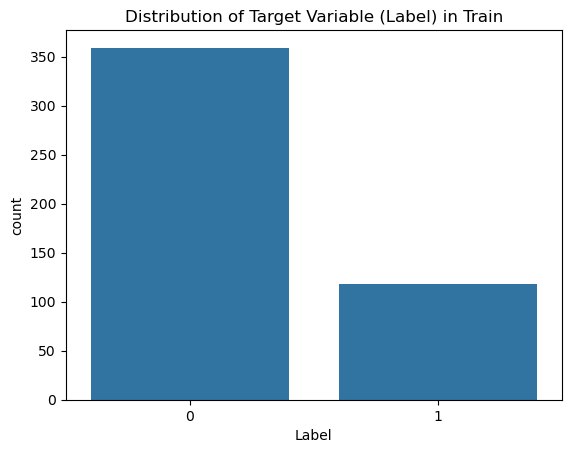

In [27]:
# Visualize the label assymetry
sns.countplot(x='Label', data=df_train)
plt.title("Distribution of Target Variable (Label) in Train")
plt.show()

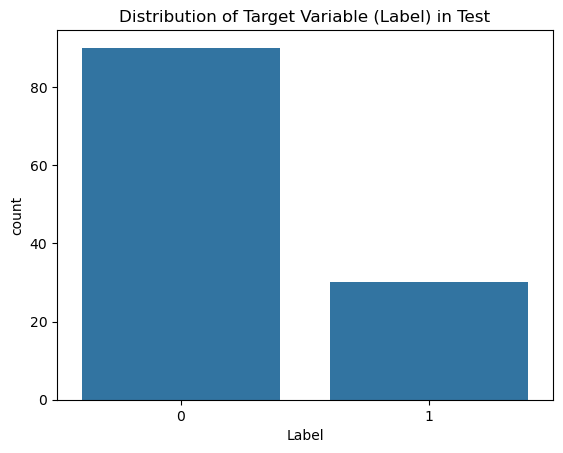

In [28]:
# Visualize the label assymetry
sns.countplot(x='Label', data=df_test)
plt.title("Distribution of Target Variable (Label) in Test")
plt.show()

We observe an imbalance in the target variable, with fewer positive cases (label = 1). This supports our earlier decision to consider metrics like AUROC or F1-score.

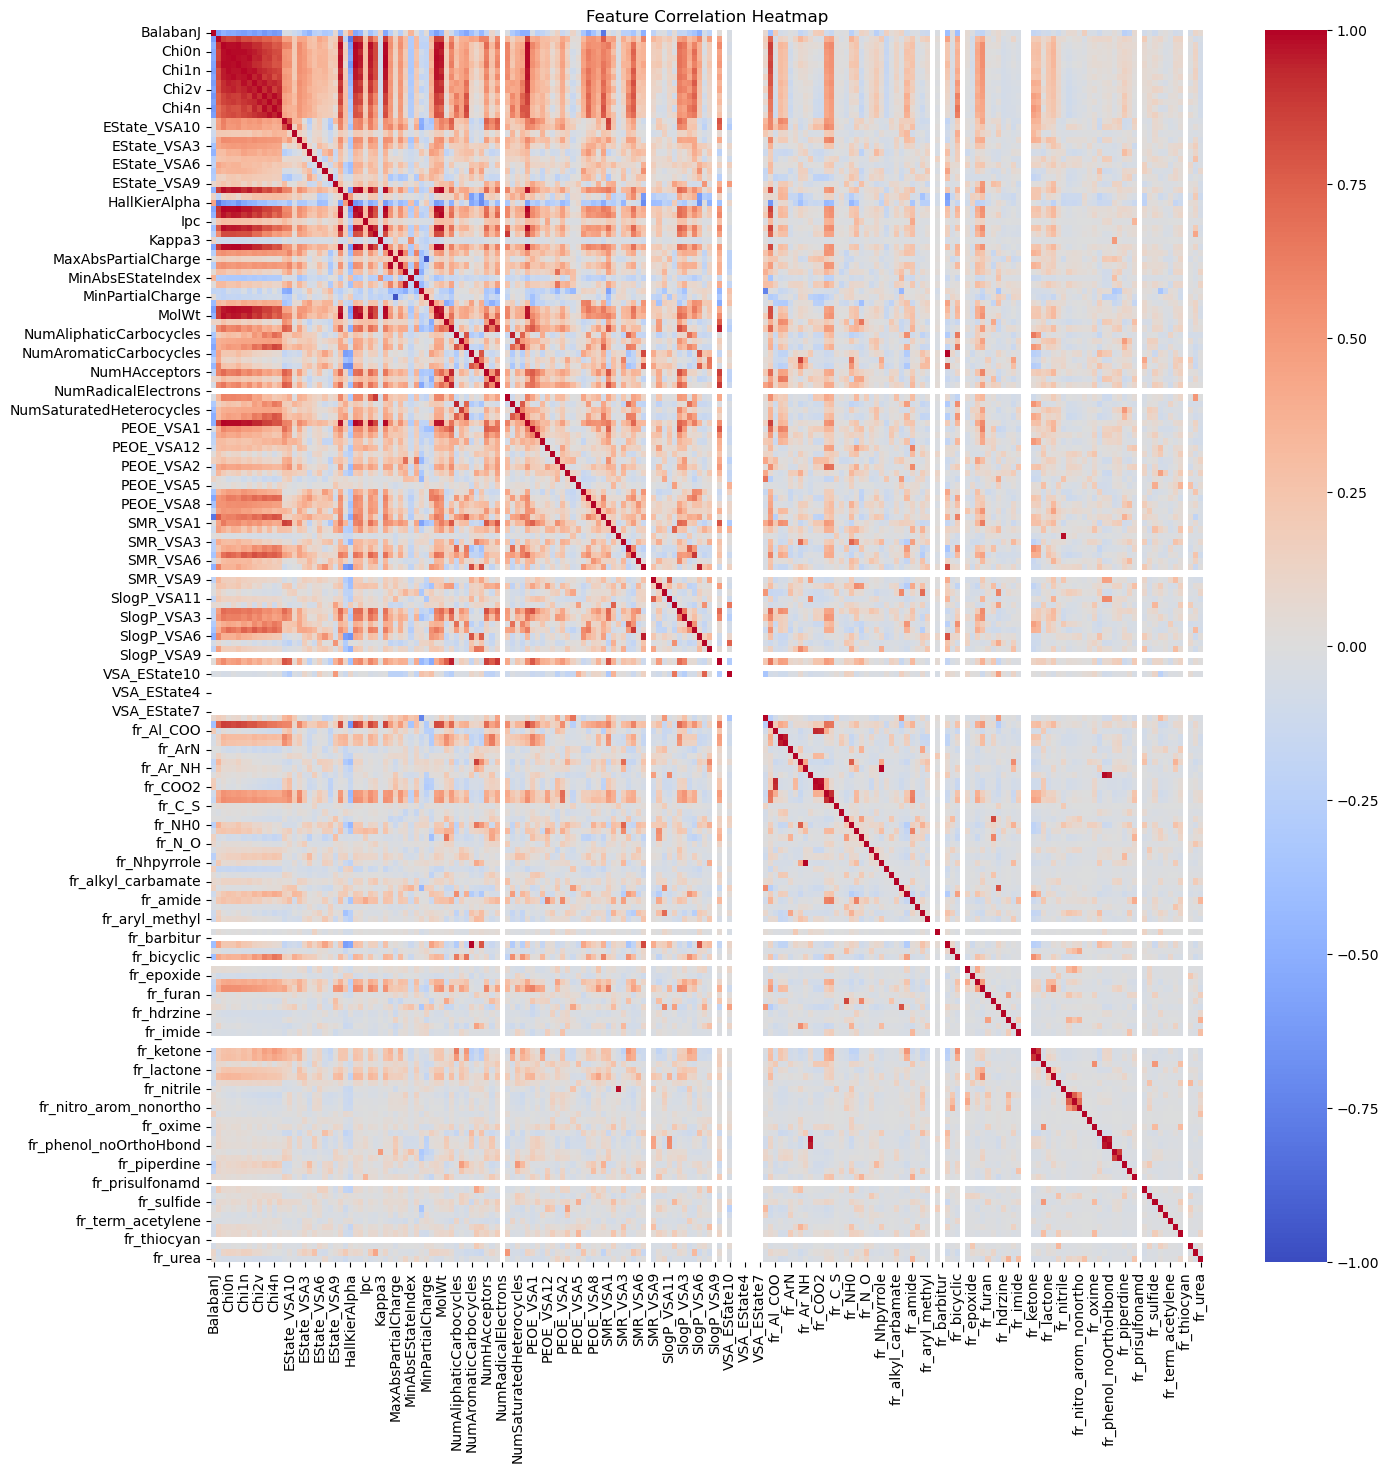

In [30]:
# plot a feature correlation heatmap
corr = df_train.iloc[:, 2:].corr()

plt.figure(figsize=(16, 16))
sns.heatmap(corr, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

### 🔥 Feature Correlation Insights

We visualized the Pearson correlation matrix across all 196 molecular descriptors. Key takeaways:

- **Clusters of correlation** appear among:
  - Topological descriptors (`Chi0`, `Chi1`, `Chi2`, etc.)
  - EState and VSA-based properties
  - Binary fragment features (`fr_` series)

- Some features (e.g., `Chi0`, `Chi0n`, `Chi0v`) are **highly correlated variants** of the same index type. We may consider removing or combining them to reduce dimensionality and prevent collinearity in modeling. This will be useful especially when we don't have a lot of qubits to work with.

- The binary substructure fingerprints show **modest correlations** among themselves, indicating common co-occurring functional groups (e.g., `fr_phenol` with `fr_Ar_OH`).

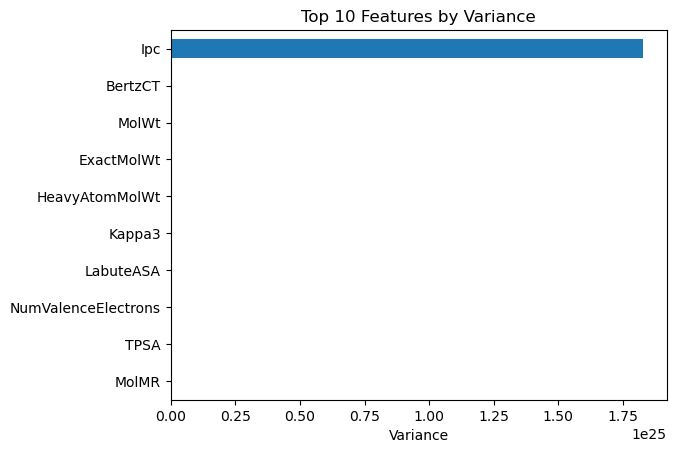

In [32]:
variances = df_train.iloc[:, 2:].var().sort_values(ascending=False)
top_variance_features = variances.head(10)
top_variance_features.plot(kind='barh')
plt.title("Top 10 Features by Variance")
plt.xlabel("Variance")
plt.gca().invert_yaxis()
plt.show()

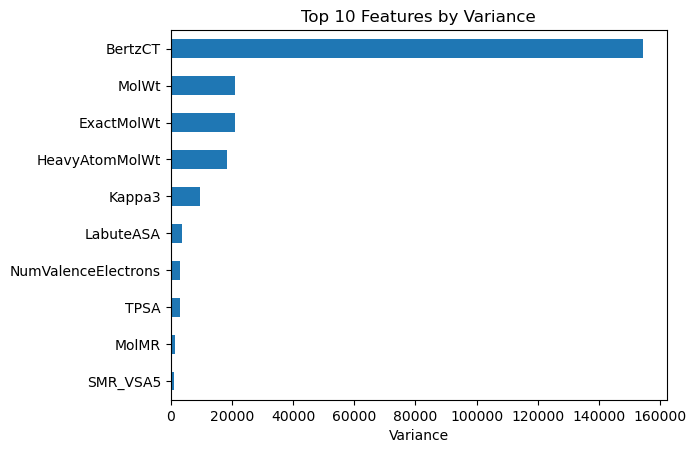

In [33]:
variances = df_train.iloc[:, 2:].var().sort_values(ascending=False)
top_variance_features = variances[1:11]
top_variance_features.plot(kind='barh')
plt.title("Top 10 Features by Variance")
plt.xlabel("Variance")
plt.gca().invert_yaxis()
plt.show()

lpc has the largest variance amongst the different features, and when we remove lpc we can see the other top 10 features better. 

lpc, according to the Excel sheet reference, is "the information content of the coefficients of the characteristic polynomial of the adjacency matrix of a hydrogen-suppressed graph of a molecule."

This is known to give very large quantities (https://github.com/rdkit/rdkit/issues/1527), and we will have to be careful it its treatment during data processing later on. 

# 🧹 Transition to Data Preparation

This notebook has provided a detailed exploratory analysis of the dataset, helping us better understand the chemical descriptors, their distributions, correlations, and the target variable.

### 📌 Summary of Insights:
- **Label Imbalance**: The target variable is imbalanced (~25% positive class), which will require careful handling during model training.
- **Redundant Features**: Many descriptors, e.g., `Chi*`, `EState*`, `VSA*`, are highly correlated. We'll apply dimensionality reduction or feature selection to reduce noise.
- **High-Variance Predictors**: A small subset of features shows significantly higher variance and is likely to carry more predictive value.
- **Sparse Binary Features**: Many `fr_` (fragment) features are binary and sparse; we may retain only the most informative ones to reduce dimensionality.
- **No Missing Values**: The dataset is clean and complete, which simplifies downstream processing.

### 🚧 Next: Data Cleaning & Feature Engineering
In the next notebook, we will:
- Standardize or normalize continuous features.
- Select or engineer features based on variance, correlation, and interpretability.
- Handle class imbalance using oversampling or class weighting.
- Prepare the dataset for classical and quantum machine learning pipelines.

With this foundation laid, we’re ready to move forward to **data preparation and model development**.
